In [56]:
import pandas as pd
import os
import numpy as np
import hashlib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

HOUSING_PATH = 'C:/study/AI Training and Jobs/books/hands_on_tenseflow/datasets/housing'

In [2]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()
housing.head()
housing.info()
housing['ocean_proximity'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()
np.random.permutation(5)

array([4, 1, 3, 2, 0])

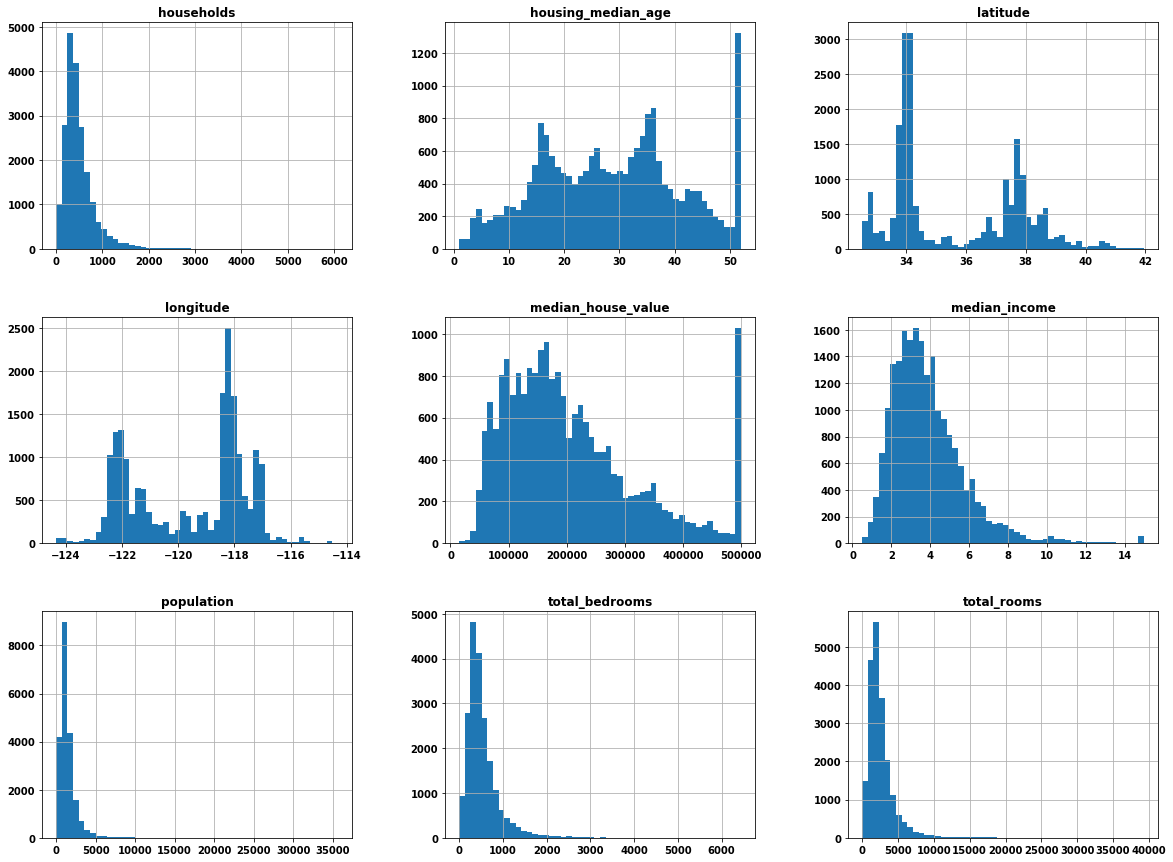

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = len(data) * test_ratio
    test_indics = shuffled_indices[:test_set_size]
    train_indics = shuffled_indices[test_set_size:]
    return data.iloc[train_indics], data.iloc[test_indics]

In [38]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [39]:
housing_with_id = housing.reset_index()   # adding an index column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [43]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [59]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

In [66]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [64]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [69]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [78]:
# for set in (strat_train_set, strat_test_set):
#     set.drop(['income_cat'], axis=1, inplace=True)

In [82]:
housing = strat_train_set.copy()

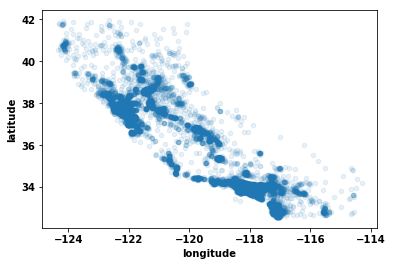

In [88]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

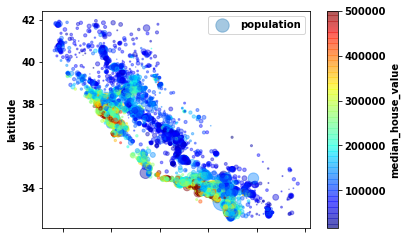

In [93]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing["population"]/100, label='population', c='median_house_value', cmap=plt.get_cmap("jet"), colorbar=True
            )
plt.legend()

## 用corr() 函数算出训练集的属性相关系数

In [94]:
corr_matrix = housing.corr()

In [99]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

## 用pandas 画出训练集的属性相关系数

In [100]:
from pandas.tools.plotting import scatter_matrix

In [ ]:
attributes = [""]